# Assignment 2 - Question 3: Tree-based Models 
**Course Name:** Machine Learning (DDA3020)

(30 points in total)

<font color=Red>*Please enter your personal information (Double-click this block first)*</font>

**Name:** 文杰

**Student ID:** 123090612

### Overview

In this question, you will use three tree-based models (Decision Tree, Bagging, and Random Forest) to solve a real problem, image classification. The tasks includes training models by different parameters, comparing the results of different models, and trying to find the best parameter combination. As a part of an assignment, your task is to **run all codes in this script and complete the parts marked with** <font color=Red>\[TASK\]</font>.

### Dataset Introduction

Since we will use a same dataset for both question 3 & 4, it's important to have an overall knowledge of this dataset. The dataset is called **Fashion-MNIST**, a member of the MNIST family, but I think it's more interesting. This dataset is an image classification task with ten categories, all of which are items from our daily lives. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image. It means that we can use 784 numbers (in the range of 0~255) to represent one image. More details can be found in https://github.com/zalandoresearch/fashion-mnist.

OK. Now it's time to start, please read and run each block of codes in order, so that you will have a smooth experience.

In [1]:
import numpy as np
import gzip
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

# Please do not modify the seed number here.
np.random.seed(336)

Don't need to carefully read this block since it's just loading the dataset. Just run it.

In [2]:
def load_mnist(path, kind, subset=None):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'%kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'%kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    
    if subset is not None:
        selected_images, selected_labels = [], []
        for label in range(10):
            indices = np.where(labels == label)[0]
            selected_indices = np.random.choice(indices, subset, replace=False)
            selected_images.append(images[selected_indices])
            selected_labels.append(labels[selected_indices])
        images = np.concatenate(selected_images, axis=0)
        labels = np.concatenate(selected_labels, axis=0)

        paired = list(zip(images, labels))
        random.shuffle(paired)
        images, labels = zip(*paired)
    
    return np.array(images), np.array(labels)

In this question, we only use a subset of Fashion-MNIST dataset to reduce compuration time.

In [3]:
X_train, y_train = load_mnist('./data/', kind='train', subset=100)
X_test, y_test = load_mnist('./data/', kind='t10k', subset=20)

You can repeat running this block for several times to see different images with its label in this dataset.

The label index of this image is: 6
The label name of this graph is: Shirt


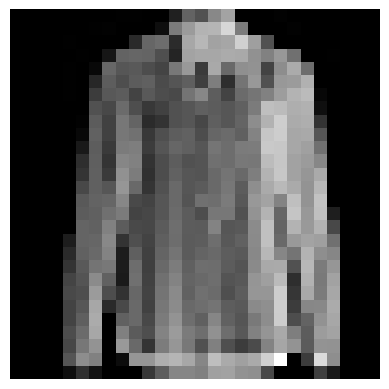

In [4]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
idx = random.choice(range(0,len(X_test)))
print(f"The label index of this image is: {y_test[idx]}")
print(f"The label name of this graph is: {label_names[y_test[idx]]}")

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In this question, we use each pixel to represent different features of a data sample. It means that each sample will have 784 features to learn and 1 label to predict. The advantage is that you don't need to struggle on data processing but focus on training models and analyzing results.

In [5]:
X_train = pd.DataFrame(X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])

In both question 3 & 4, we only use one metric, **accuracy_score**. Here is a simple example about how to use this function from sklearn.

In [6]:
from sklearn.metrics import accuracy_score
_y_true = [0,1,1,2,0]
_y_pred = [1,1,2,2,0]
accuracy_score(_y_true, _y_pred)

0.6

### Task 1
Write code to train Decision Tree Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_dt and test_acc_dt. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

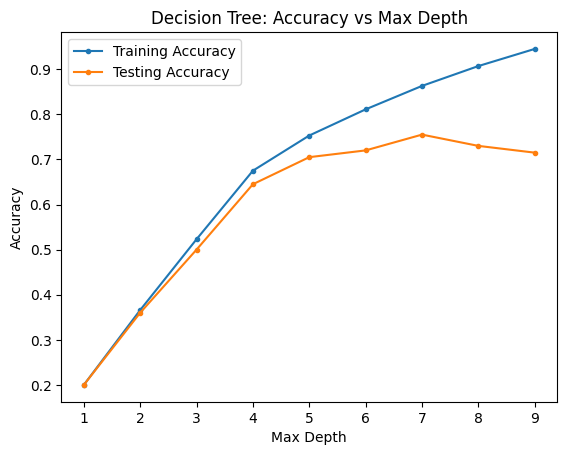

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_acc_dt = []
test_acc_dt = []
depth_list = range(1, 10)

for depth in depth_list:
    # Create Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=depth, random_state=336)
    # Fit the model
    clf.fit(X_train, y_train)
    # Predict on training and test data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    # Append to lists
    train_acc_dt.append(train_acc)
    test_acc_dt.append(test_acc)

# Plotting
plt.plot(depth_list, train_acc_dt, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_dt, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:

#### Graph Description
The graph titled "Decision Tree: Accuracy vs Max Depth" plots the accuracy of a decision tree model against its maximum depth, ranging from 1 to 9. Two lines represent:
- **Training Accuracy (Blue Line):**
  - Starts at ~0.2 at Max Depth 1.
  - Increases steadily to ~0.37 (Depth 2), ~0.52 (Depth 3), ~0.68 (Depth 4), ~0.75 (Depth 5), ~0.85 (Depth 7), ~0.90 (Depth 8), and slightly above 0.90 (Depth 9).
- **Testing Accuracy (Orange Line):**
  - Starts at ~0.2 at Max Depth 1.
  - Rises to ~0.36 (Depth 2), ~0.50 (Depth 3), ~0.65 (Depth 4), peaks at ~0.70 (Depth 5), then plateaus with slight fluctuations (~0.70 at Depth 6, ~0.73 at Depth 7, ~0.71 at Depth 8, ~0.69 at Depth 9).

#### Key Observations
- Training accuracy increases consistently with max depth, indicating better fit to the training data.
- Testing accuracy improves up to Max Depth 5 (~0.70) but then stabilizes or slightly decreases, suggesting overfitting beyond this point.
- The gap between training and testing accuracy widens after Max Depth 5, a clear sign of overfitting.

#### Analysis
- **Early Improvement (Depth 1–5):** Both accuracies rise as the tree depth increases, showing that a deeper tree captures more data patterns, improving generalization up to Depth 5.
- **Overfitting Beyond Depth 5:** After peaking at ~0.70, testing accuracy stagnates while training accuracy continues to climb, indicating the model is memorizing training data rather than generalizing.
- **Optimal Depth:** Max Depth 5 offers the best balance, with the highest testing accuracy (~0.70) before overfitting becomes prominent.

#### Conclusion
The decision tree performs optimally at a max depth of 5, achieving a testing accuracy of approximately 0.70. Beyond this, overfitting occurs, as evidenced by the growing gap between training (>0.90 at Depth 9) and testing accuracy (~0.69 at Depth 9).

### Task 2
Write code to train Random Forest Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_rf and test_acc_rf. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

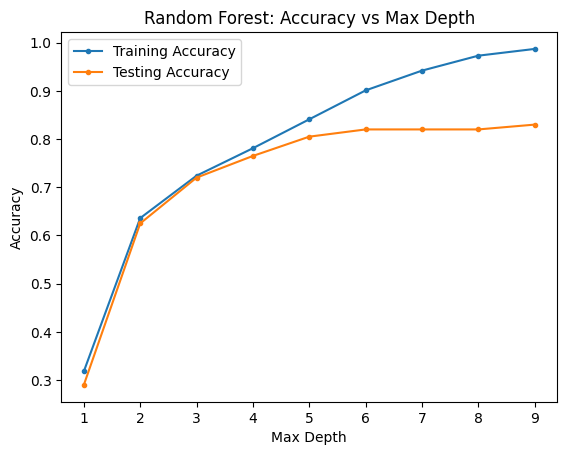

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_acc_rf = []
test_acc_rf = []
depth_list = range(1, 10)

for depth in depth_list:
    # Create Random Forest Classifier
    clf = RandomForestClassifier(max_depth=depth, random_state=336)
    # Fit the model
    clf.fit(X_train, y_train)
    # Predict on training and test data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    # Append to lists
    train_acc_rf.append(train_acc)
    test_acc_rf.append(test_acc)

# Plotting
plt.plot(depth_list, train_acc_rf, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_rf, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Try to compare this graph with the above one (Decision Tree's graph), and write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:

#### Graph Description
The graph titled "Random Forest: Accuracy vs Max Depth" shows the accuracy of a Random Forest model against max depths from 1 to 9. Two lines represent:
- **Training Accuracy (Blue Line):**
  - Starts at ~0.32 at Max Depth 1.
  - Rises to ~0.64 (Depth 2), ~0.73 (Depth 3), ~0.78 (Depth 4), ~0.84 (Depth 5), and approaches ~1.0 (Depth 9).
- **Testing Accuracy (Orange Line):**
  - Starts at ~0.28 at Max Depth 1.
  - Increases to ~0.62 (Depth 2), ~0.71 (Depth 3), ~0.75 (Depth 4), then plateaus around 0.8–0.82 from Depth 4 to 9.

#### Key Observations
- Training accuracy rises steadily, nearing 1.0 by Max Depth 9, showing excellent fit to the training data.
- Testing accuracy improves up to Max Depth 4 (~0.8) and then stabilizes, fluctuating slightly between 0.8 and 0.82.
- The gap between training and testing accuracy widens after Max Depth 4, suggesting potential overfitting, though less severe than in Task 1.

#### Analysis
- **Improvement Up to Depth 4:** Both accuracies increase with depth, with testing accuracy reaching ~0.8 at Depth 4, indicating the Random Forest captures key patterns effectively up to this point.
- **Stabilization Beyond Depth 4:** Testing accuracy plateaus, while training accuracy continues to rise, suggesting deeper trees overfit the training data without improving generalization.
- **Comparison to Decision Tree:** Random Forest achieves higher testing accuracy (~0.8 vs. 0.70) and shows less severe overfitting, thanks to its ensemble approach averaging multiple trees.

#### Conclusion
The Random Forest model performs best at a max depth of around 4, with a testing accuracy of approximately 0.8. Beyond this, training accuracy approaches 1.0, but testing accuracy remains stable (~0.8–0.82), indicating diminishing returns and mild overfitting. It outperforms the decision tree in both accuracy and overfitting resistance.

### Task 3
Write code to train **both Bagging and Random Forest** Classification models with different **n_estimators** (=10,20,50,100). Save the accuracy scores of predicting test data for both models respectively in bagging_test_acc and rf_test_acc. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

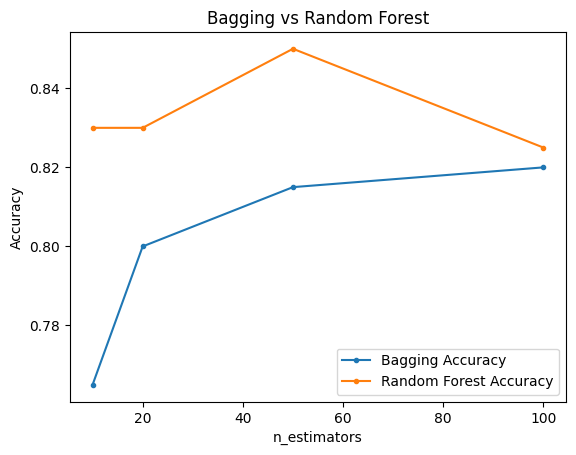

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_estimators_list = [10, 20, 50, 100]
bagging_test_acc = []
rf_test_acc = []

for n in n_estimators_list:
    # Bagging Classifier
    bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n, random_state=336)
    bagging_clf.fit(X_train, y_train)
    y_test_pred_bagging = bagging_clf.predict(X_test)
    bagging_acc = accuracy_score(y_test, y_test_pred_bagging)
    bagging_test_acc.append(bagging_acc)
    
    # Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=336)
    rf_clf.fit(X_train, y_train)
    y_test_pred_rf = rf_clf.predict(X_test)
    rf_acc = accuracy_score(y_test, y_test_pred_rf)
    rf_test_acc.append(rf_acc)

# Plotting
plt.plot(n_estimators_list, bagging_test_acc, marker=".", label='Bagging Accuracy')
plt.plot(n_estimators_list, rf_test_acc, marker=".", label='Random Forest Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Bagging vs Random Forest')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both models. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:

#### Graph Description
The graph titled "Bagging vs Random Forest" compares the accuracy of Bagging and Random Forest models against the number of estimators (0 to 100). Two lines represent:
- **Bagging Accuracy (Blue Line):**
  - Starts at ~0.76 at 0 estimators.
  - Increases to ~0.80 (20 estimators), ~0.81 (50 estimators), remains ~0.81–0.82 (50–100 estimators), and reaches ~0.82 (100 estimators).
- **Random Forest Accuracy (Orange Line):**
  - Starts at ~0.83 at 0 estimators.
  - Stays ~0.83 (0–20 estimators), peaks slightly above 0.84 (50 estimators), then declines to ~0.83 (80 estimators) and ~0.82 (100 estimators).

#### Key Observations
- Bagging accuracy improves steadily with more estimators, reaching ~0.82 at 100 estimators.
- Random Forest starts higher (~0.83), peaks at 50 estimators, then slightly decreases to ~0.82 by 100 estimators.

#### Analysis
- **Bagging:** The consistent accuracy increase (0.76 to 0.82) with more estimators shows that averaging more trees reduces variance and enhances generalization.
- **Random Forest:** Starting at a higher accuracy (~0.83), it peaks at 50 estimators but declines to ~0.82 by 100 estimators. This unusual drop may reflect dataset-specific behavior or random seed effects, as Random Forest typically stabilizes with more estimators.
- **Comparison:** Random Forest initially outperforms Bagging, but Bagging catches up at 100 estimators. This suggests Bagging’s bootstrap sampling benefits more from additional trees than Random Forest’s feature randomness for this dataset.
- **Optimal Estimators:** Bagging improves up to 100 estimators (and possibly beyond), while Random Forest peaks at 50 estimators.

#### Conclusion
- **Bagging:** Accuracy rises steadily to ~0.82 at 100 estimators, benefiting from more trees and suggesting further gains with additional estimators.
- **Random Forest:** Peaks slightly above 0.84 at 50 estimators but drops to ~0.82 by 100 estimators, an atypical trend possibly due to dataset specifics.
- **Preference:** Random Forest is still higher but Bagging with 100 estimators is preferable here (more promising), offering consistent improvement and slightly better accuracy than Random Forest at higher estimator counts.

### Task 4
Write code to find the best parameter combination from **\[n_estimators=50/100/200, max_depth=5/10/20/50\]** by 4-fold cross validation. Please use GridSearchCV from sklearn to implement that. Output the best parameter combination and the test accuracy score with the best parameters. <font color=Red>\[TASK\]</font> (6 points)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50]
}

# Create Random Forest Classifier
rf = RandomForestClassifier(random_state=336)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on test data with best model
y_test_pred_best = best_model.predict(X_test)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

print("Best params:", best_params)
print("Test Accuracy with Best Model: ", test_acc_best)

Best params: {'max_depth': 10, 'n_estimators': 100}
Test Accuracy with Best Model:  0.825
